# Import

In [ ]:
import re
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, HourLocator
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from calendar import monthrange
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None  # default='warn'
fevrier = pd.read_csv(r"C:\Users\manon\Dev\Projet3_velov\2023-02-allege15min.csv", index_col=0)
bornes_velov = pd.read_csv(r"C:\Users\manon\Dev\Projet3_velov\bornes_velov_clean.csv")
fevrier.reset_index(inplace=True)

## df 1er fevrier 2023
premierfevrier = fevrier[fevrier["horodate"] < "2023-02-02"]
premierfevrier = premierfevrier.merge(bornes_velov, how="left", on="number")
premierfevrier["horodate"]= pd.to_datetime(fevrier["horodate"])


# Matplotlib

In [ ]:
premierfevrier.head(1)

,horodate,heure_exacte,number,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity,name,address,coordonnees,latitude,longitude
0,2023-02-01 00:04:30+01:00,2023-02-01 00:04:30+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869


In [ ]:
# récupération des numéros de station selon leur capacité 
premierfevrier["capacity"].sort_values().unique()

array([  5,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  46,  50,  59,  94,  95, 115],
      dtype=int64)

In [ ]:
premierfevrier["number"][(premierfevrier["capacity"]== 21) | (premierfevrier["capacity"]== 35) |(premierfevrier["capacity"]== 115)].unique()

array([ 2041,  3013,  3037,  4022,  5041,  6035,  7024,  8004, 10018,
       10036, 10122], dtype=int64)

In [ ]:
premierfevrier[premierfevrier["number"]==8004].head(1)

,horodate,heure_exacte,number,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity,name,address,coordonnees,latitude,longitude
23305,2023-02-01 00:00:56+01:00,2023-02-01 00:00:56+01:00,8004,12,10,9,21,8004 - MAIRIE DU 8E,Devant la mairie du 8e,"['45.735158', '4.872803']",45.735158,4.872803


In [ ]:
liste_stations = [10018, 10002, 8004]
sta_10018 =premierfevrier[premierfevrier["number"]==10018]
sta_10002 =premierfevrier[premierfevrier["number"]==10002]
sta_8004 =premierfevrier[premierfevrier["number"]==8004]

## Graph .plt

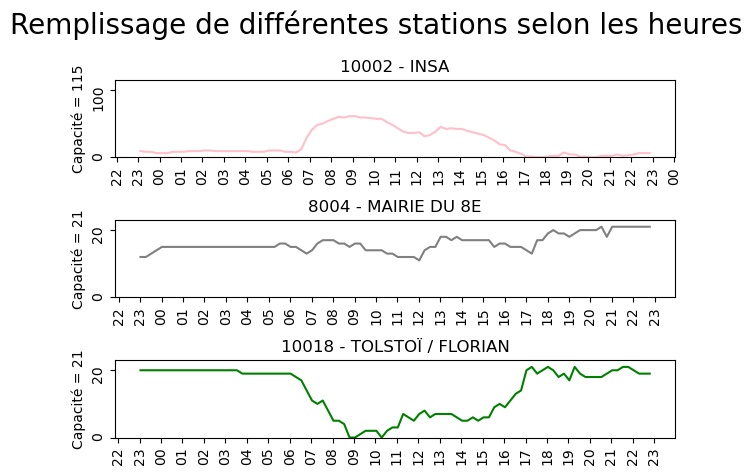

In [ ]:
fig, ax = plt.subplots(3,1)
# Pour formater la date d'une certaine manière sur tous les graphs dans le set_major_formatter
date_form = DateFormatter("%H")

ax1=plt.subplot(311)
sns.lineplot(data=sta_10002, x="horodate", y="availabilities.all.types", color="pink")
ax1.set_ylim(0, 115)
ax1.set_title("10002 - INSA")
plt.ylabel("Capacité = 115")
plt.xlabel("")
plt.tick_params(labelrotation=90)
ax1.xaxis.set_major_formatter(date_form)
ax1.xaxis.set_major_locator(mdates.HourLocator())

ax2=plt.subplot(312)
sns.lineplot(data=sta_8004, x="horodate", y="availabilities.all.types", color="grey")
ax2.set_ylim(0, 23)
ax2.set_title("8004 - MAIRIE DU 8E")
plt.ylabel("Capacité = 21")
plt.xlabel("")
plt.tick_params(labelrotation=90)
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(mdates.HourLocator())

ax3=plt.subplot(313)
sns.lineplot(data=sta_10018, x="horodate", y="availabilities.all.types", color="green")
ax3.set_ylim(0, 23)
ax3.set_title("10018 - TOLSTOÏ / FLORIAN")
plt.ylabel("Capacité = 21")
plt.xlabel("")
plt.tick_params(labelrotation=90)
ax3.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_locator(mdates.HourLocator())

fig.suptitle("Remplissage de différentes stations selon les heures", fontsize=20)
fig.tight_layout()
plt.show()

# Plotly

In [ ]:
premierfevrier

,horodate,heure_exacte,number,availabilities.all.types,availabilities.electricalBikes,availabilities.stands,capacity,name,address,coordonnees,latitude,longitude
0,2023-02-01 00:04:30+01:00,2023-02-01 00:04:30+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869
1,2023-02-01 00:19:30+01:00,2023-02-01 00:24:41+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869
2,2023-02-01 00:34:30+01:00,2023-02-01 00:34:46+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869
3,2023-02-01 00:49:30+01:00,2023-02-01 00:54:57+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869
4,2023-02-01 01:04:30+01:00,2023-02-01 01:05:02+01:00,555,0,0,3,5,0-555 - ATELIER VÉLO'V,NaN,"['45.780403', '4.904869']",45.780403,4.904869
...,...,...,...,...,...,...,...,...,...,...,...,...
41140,2023-02-01 22:50:59+01:00,2023-02-01 22:56:33+01:00,34002,7,3,8,15,34002 - NEUVILLE - STADE,NaN,"['45.870877', '4.839595']",45.870877,4.839595
41141,2023-02-01 23:05:59+01:00,2023-02-01 23:06:38+01:00,34002,7,3,8,15,34002 - NEUVILLE - STADE,NaN,"['45.870877', '4.839595']",45.870877,4.839595
41142,2023-02-01 23:20:59+01:00,2023-02-01 23:26:45+01:00,34002,7,3,8,15,34002 - NEUVILLE - STADE,NaN,"['45.870877', '4.839595']",45.870877,4.839595
41143,2023-02-01 23:35:59+01:00,2023-02-01 23:36:49+01:00,34002,7,3,8,15,34002 - NEUVILLE - STADE,NaN,"['45.870877', '4.839595']",45.870877,4.839595


In [ ]:
fig2 = px.line(premierfevrier[(premierfevrier["number"]== 10018) |
                             (premierfevrier["number"]== 10002)| 
                             (premierfevrier["number"]== 8004)],
              x="horodate",
              y="availabilities.all.types",
              color='number',
              color_discrete_sequence= ["grey", "pink", "green"], 
              labels={"horodate" : "heure", "availabilities.all.types" : "vélos disponibles", "number" : "n° de station"}, 
              title="Quantité de vélos disponibles dans les stations")
fig2.show()

In [ ]:
# Nombre de stations en service 
premierfevrier["number"].nunique()

429

In [ ]:
# même chose 
premierfevrier["number"].unique().size

429

In [ ]:
capacite_stations = premierfevrier[["number", "capacity"]].drop_duplicates()

In [ ]:
capacite_stations

,number,capacity
0,555,5
96,1001,16
191,1002,41
287,1003,22
383,1005,16
...,...,...
40665,30002,18
40761,32001,17
40857,33001,18
40953,34001,20


In [ ]:
fig3 = px.histogram(capacite_stations, title="Répartition des stations velov lyonnaises selon leur capacité maximale", x="capacity", text_auto=True, barmode="group", color_discrete_sequence=['#DE3163'], nbins=12, labels={"capacity" : "capacite maximale"})
fig3.update_layout(bargap=0.1)
fig3.update_yaxes(title_text="nombre de stations")
fig3.show()